# Regressão Polinomial

In [67]:
import scipy.io as spio
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd 

from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

from aprendizado_maquina import regressao_linear as rl
%matplotlib inline

In [2]:
data = spio.loadmat('data/ex5data1.mat')
data.keys()

dict_keys(['__header__', 'Xval', '__version__', 'ytest', 'Xtest', 'yval', 'y', '__globals__', 'X'])

In [3]:
y = data['y']
X = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]

print('X_train:', X.shape)
print('y_train:', y.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


In [38]:
def mapearCaracteristicas(c1, grau_polinomio):
    assert grau_polinomio >= 1
    def iter():
        for i in range(1, grau_polinomio + 1):            
                yield np.power(c1, i)
    return np.vstack(iter())

In [70]:
original_x = pd.DataFrame(data=X, columns=["Ones", "X"])
original_x.head()

,Ones,X
0,1.0,-15.936758
1,1.0,-29.152979
2,1.0,36.189549
3,1.0,37.492187
4,1.0,-48.058829


In [77]:
   
polinomio = mapearCaracteristicas(X.T, 8)
transformado = pd.DataFrame(data=polinomio)
original_x.head()

['Ones', 'x1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']


,Ones,X
0,1.0,-15.936758
1,1.0,-29.152979
2,1.0,36.189549
3,1.0,37.492187
4,1.0,-48.058829


In [48]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X[:,1].reshape(-1,1))

regr2 = LinearRegression()
regr2.fit(X_train_poly, y)

plot_x = np.linspace(-60,45)

#Usando o coeficientes para calcular y
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

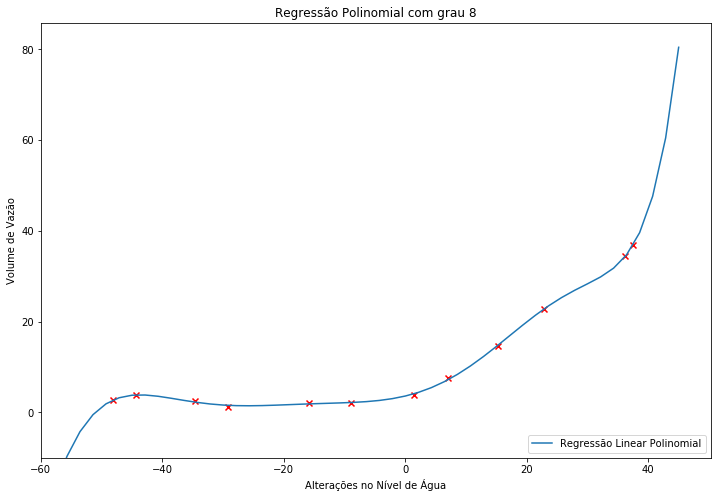

In [59]:
fig, ax = plt.subplots(figsize=(12,8)) 

ax.set_title('Regressão Polinomial com grau 8')

ax.plot(plot_x, plot_y, label='Regressão Linear Polinomial')
ax.set_xlabel("Alterações no Nível de Água")  
ax.set_ylabel('Volume de Vazão')
ax.scatter(X[:,1], y, marker='x', c='r')
ax.set_ylim(ymin=-10)
ax.set_xlim(xmin=-60)
ax.legend(loc=4)